# Answer1

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [7]:
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

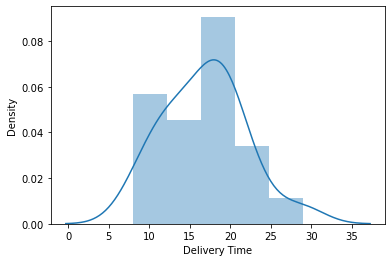

In [9]:
sns.distplot(dataset['Delivery Time'])

C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

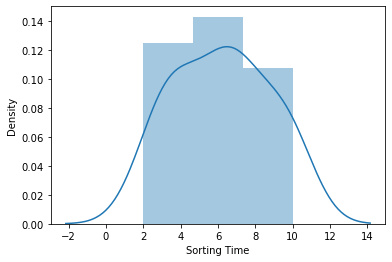

In [10]:
sns.distplot(dataset['Sorting Time'])

Feature Engineering

In [13]:
# Renaming Dataset
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# correlation analysis

In [14]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

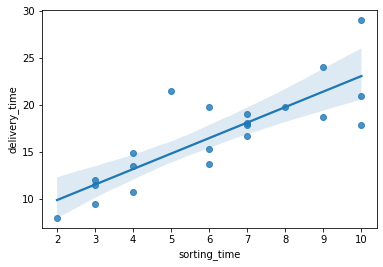

In [15]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [16]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

Model Testing

In [18]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [19]:
# finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [21]:
# finding rsquared_values
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

MOdel Prediction

In [23]:
# Manual prediction for say sorting time 5
delivery_time=(6.582734+1.649020*5)
delivery_time

14.827834

In [26]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [28]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [29]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Answer 2

In [33]:
ds=pd.read_csv('Salary_Data.csv')
ds.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

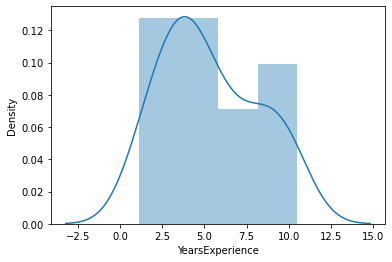

In [34]:
sns.distplot(ds['YearsExperience'])

C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

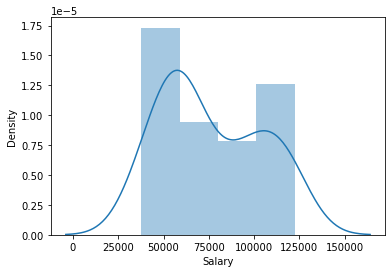

In [35]:
sns.distplot(ds['Salary'])

In [36]:
ds.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

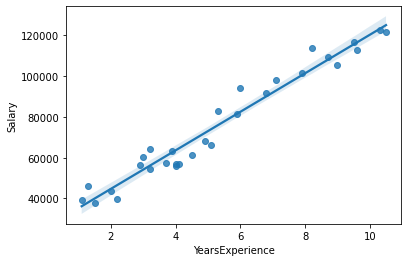

In [37]:
sns.regplot(x=ds['YearsExperience'],y=ds['Salary'])

# Model Building

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        17:14:24   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model=smf.ols("Salary~YearsExperience",data=ds).fit()

In [40]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [41]:
model.pvalues,model.tvalues

(Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64,
 Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64)

In [42]:
# Finding Rsquared values
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Model Predictions

In [45]:
# Manual prediction for say 3 Years Experience
Salary=(25792.200199)+(9449.962321)*3
Salary

54142.087162

In [48]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data1=pd.Series([3,5])
new_data1

0    3
1    5
dtype: int64

In [50]:
data_pred1=pd.DataFrame(new_data1,columns=['YearsExperience'])
data_pred1

,YearsExperience
0,3
1,5


In [51]:
model.predict(data_pred1)

0    54142.087163
1    73042.011806
dtype: float64